#Churn Analysis Data Project


#Objective
- Howmany users across different category are likely to be that users who are not using the services

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
cdata = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
cdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cdata.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
cdata.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
cdata.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
LabelEncoder = LabelEncoder()
cdata['Gender'] = LabelEncoder.fit_transform(cdata['Gender'])
cdata = pd.get_dummies(cdata, columns=['Geography'], drop_first=True)

In [ ]:
cdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


#Explarotory Data Analysis
- Understanding the relation of each columns

<ipython-input-5-9430bc4b3823>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=cdata, palette='Set2')


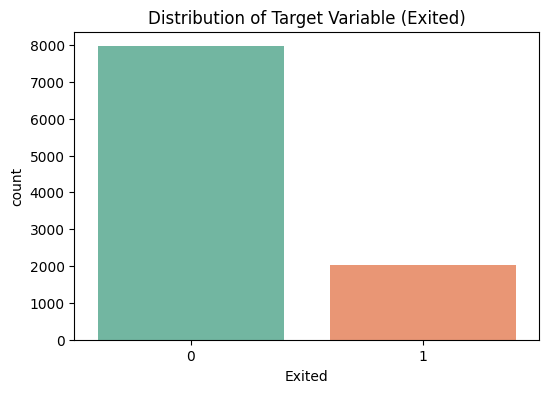

In [ ]:
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=cdata, palette='Set2')
plt.title('Distribution of Target Variable (Exited)')
plt.show()


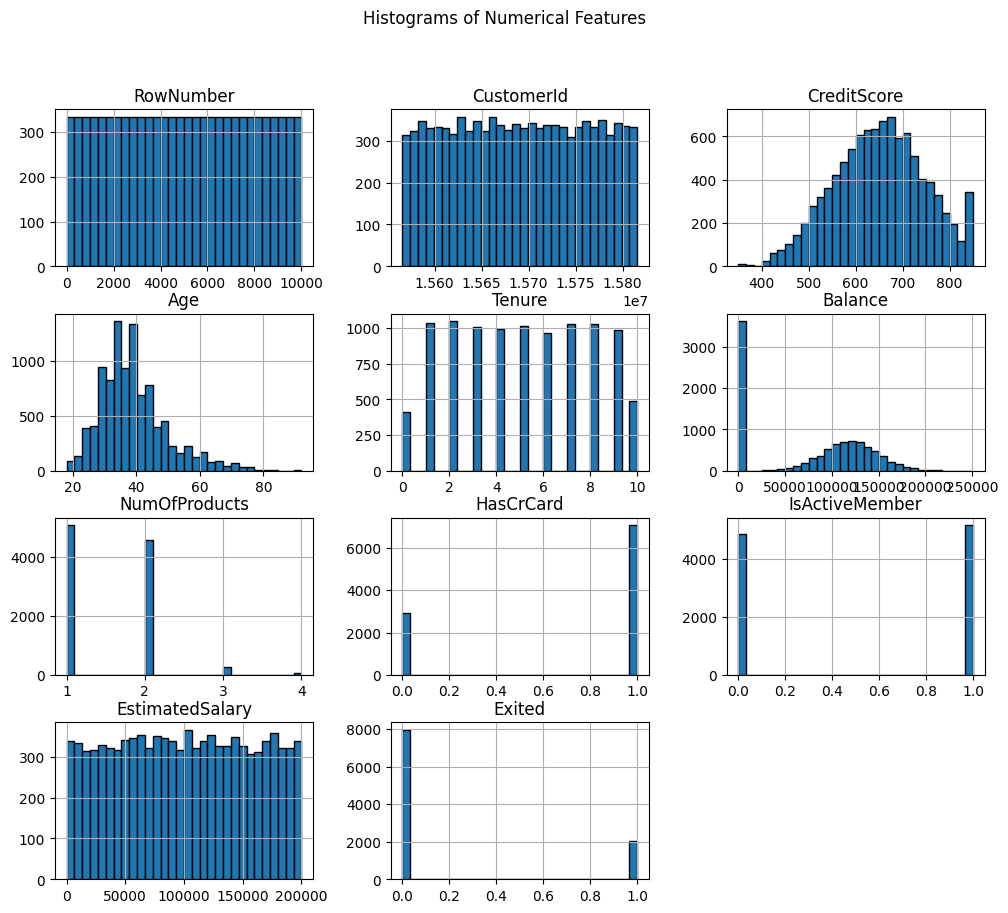

In [ ]:
# Histogram of Numerical Variables
cdata.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

<ipython-input-8-194a01540d5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='CreditScore', data=cdata, palette='Set3')


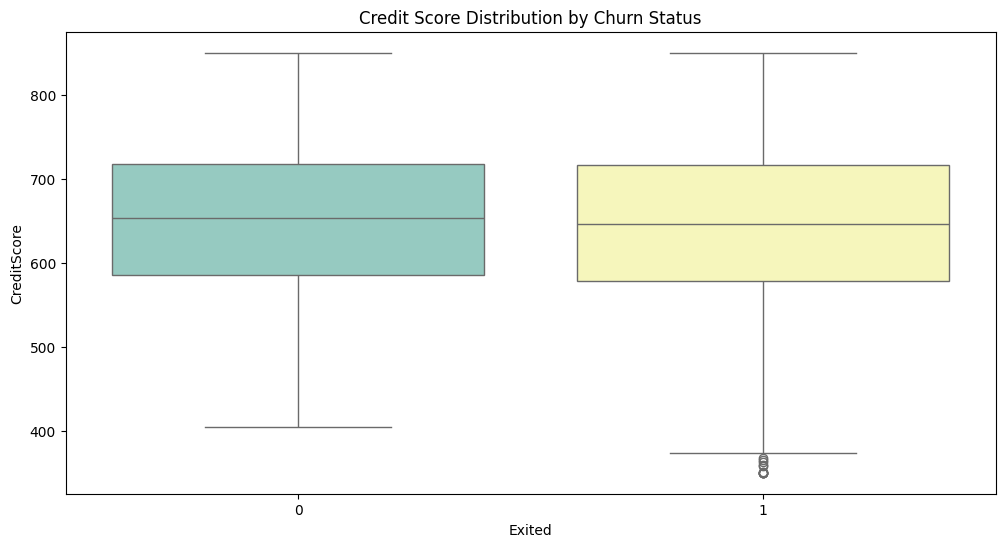

In [ ]:
# Boxplot of Numerical Features against Target Variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='CreditScore', data=cdata, palette='Set3')
plt.title('Credit Score Distribution by Churn Status')
plt.show()



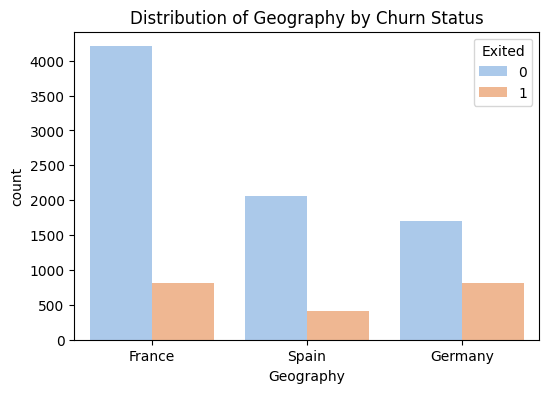

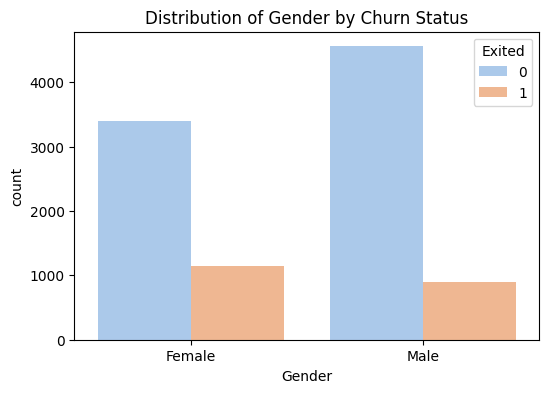

In [ ]:
# Countplot for Categorical Variables
categorical_cols = ['Geography', 'Gender']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=cdata, hue='Exited', palette='pastel')
    plt.title(f'Distribution of {col} by Churn Status')
    plt.show()


<ipython-input-10-2b8f56748434>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cdata[cdata['Exited'] == 0]['EstimatedSalary'], label='Not Churned', shade=True)
<ipython-input-10-2b8f56748434>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cdata[cdata['Exited'] == 1]['EstimatedSalary'], label='Churned', shade=True)


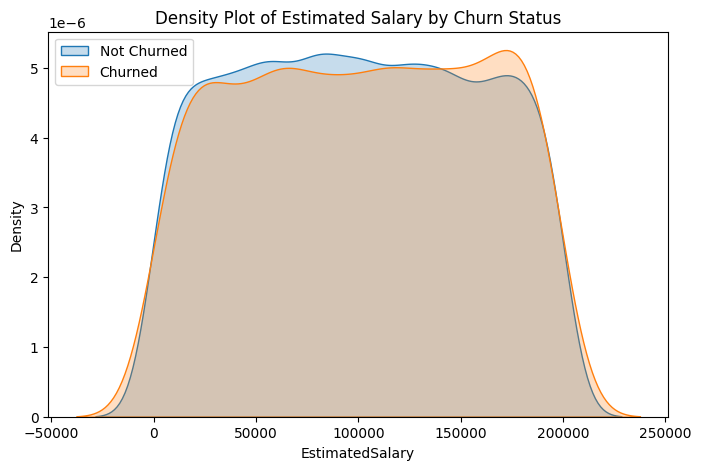

In [ ]:
# KDE Plot for Continuous Features
plt.figure(figsize=(8, 5))
sns.kdeplot(cdata[cdata['Exited'] == 0]['EstimatedSalary'], label='Not Churned', shade=True)
sns.kdeplot(cdata[cdata['Exited'] == 1]['EstimatedSalary'], label='Churned', shade=True)
plt.title('Density Plot of Estimated Salary by Churn Status')
plt.legend()
plt.show()

<ipython-input-11-7d6c8f7b5687>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y='Age', data=cdata, palette='muted')


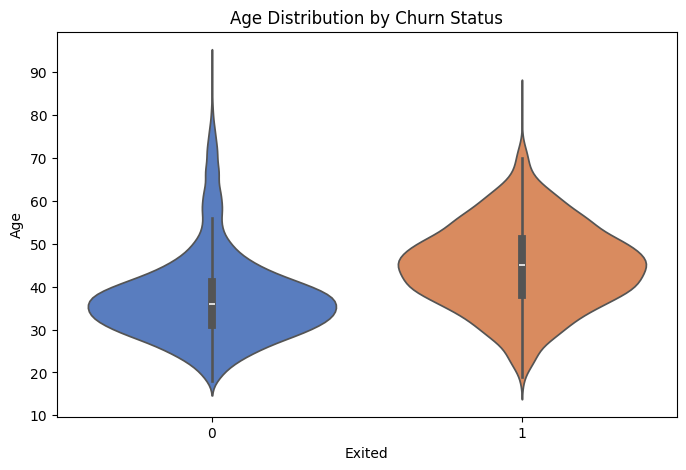

In [ ]:
# Violin Plot for Age Distribution
plt.figure(figsize=(8, 5))
sns.violinplot(x='Exited', y='Age', data=cdata, palette='muted')
plt.title('Age Distribution by Churn Status')
plt.show()

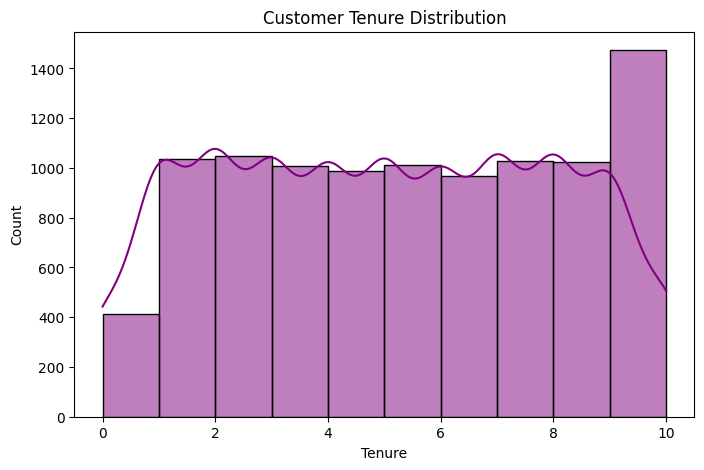

In [ ]:
# Customer Tenure Distribution
plt.figure(figsize=(8, 5))
sns.histplot(cdata['Tenure'], bins=10, kde=True, color='purple')
plt.title('Customer Tenure Distribution')
plt.show()

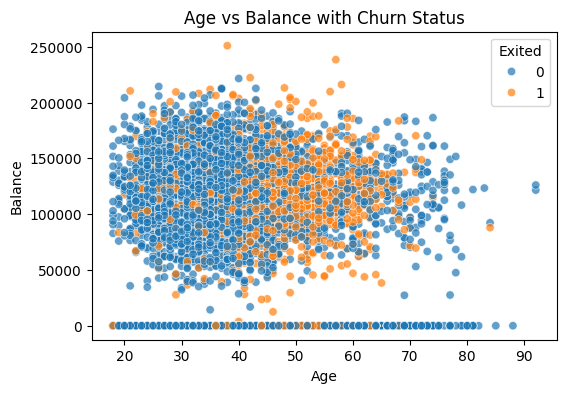

In [ ]:
# Correlation Between Age and Balance
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=cdata, alpha=0.7)
plt.title('Age vs Balance with Churn Status')
plt.show()


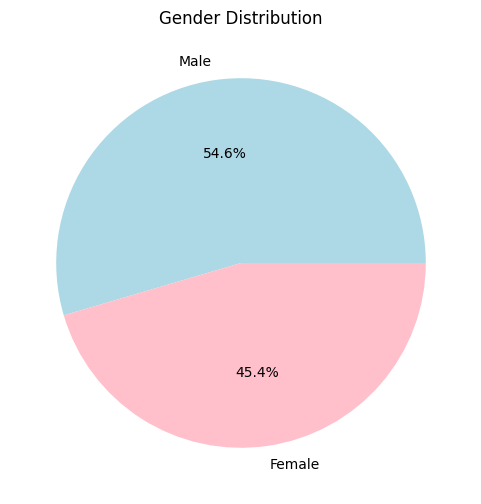

In [ ]:
# Pie Chart for Gender Distribution
plt.figure(figsize=(6, 6))
cdata['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

#Feature Selection


In [ ]:
features = ['CreditScore','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
x = cdata[features]
y = cdata['Exited']

In [ ]:
features

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spai']

#Splited into the train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [ ]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[1551   56]
 [ 211  182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Accuracy: 0.8665


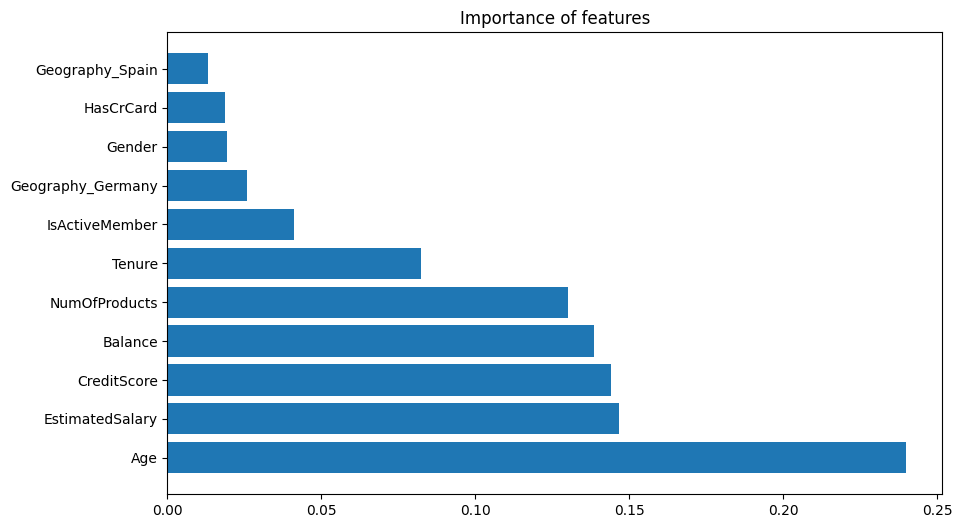

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Importance of features")
plt.barh(range(x.shape[1]), importances[indices])
plt.yticks(range(x.shape[1]), names)
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


#Build and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

#Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

#Evaluate the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log_reg)
print("\nClassification Report (Logistic Regression):\n", class_report_log_reg)
print("\nAccuracy (Logistic Regression):", accuracy_log_reg)

Confusion Matrix (Logistic Regression):
 [[1543   64]
 [ 314   79]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Accuracy (Logistic Regression): 0.811


#Support Vector Machine

In [ ]:
from sklearn.svm import SVC

#build and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

#Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Confusion Matrix (SVM):\n", conf_matrix_svm)
print("\nClassification Report (SVM):\n", class_report_svm)
print("\nAccuracy (SVM):", accuracy_svm)

Confusion Matrix (SVM):
 [[1607    0]
 [ 393    0]]

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000


Accuracy (SVM): 0.8035


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#KNN Classsifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Build and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Make prediction
y_pred_knn = knn_model.predict(X_test)

#Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Confusion Matrix (KNN):\n", conf_matrix_knn)
print("\nClassification Report (KNN):\n", class_report_knn)
print("\nAccuracy (KNN):", accuracy_knn)

Confusion Matrix (KNN):
 [[1514   93]
 [ 247  146]]

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000


Accuracy (KNN): 0.83


#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Build and train the GBM
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

#Make prediction
y_pred_gbm = gbm_model.predict(X_test)

#Evaluate the model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

print("Confusion Matrix (GBM):\n", conf_matrix_gbm)
print("\nClassification Report (GBM):\n", class_report_gbm)
print("\nAccuracy (GBM):", accuracy_gbm)


Confusion Matrix (GBM):
 [[1543   64]
 [ 201  192]]

Classification Report (GBM):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Accuracy (GBM): 0.8675


#Rendom Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#buid and train the random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Make prediction
y_pred_rf = rf_model.predict(X_test)

#Evaluate the model

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)
print("\nClassification Report (Random Forest):\n", class_report_rf)
print("\nAccuracy (Random Forest):", accuracy_rf)

Confusion Matrix (Random Forest):
 [[1551   56]
 [ 211  182]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Accuracy (Random Forest): 0.8665


#Data Manipulation for additional feature selection

In [ ]:
cdata = pd.read_csv('/content/Churn_Modelling.csv')

#Binary feature for Balance
cdata['BalanceZero'] = (cdata['Balance'] == 0).astype(int)

#Age Group
cdata['AgeGroup'] = pd.cut(cdata['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

#Balance to salary Ratio
cdata['BalanceSalaryRatio'] = cdata['Balance'] / cdata['EstimatedSalary']

#Interaction features between NumOfProducts and IsActiveMember
cdata['NumOfProductsIsActiveMember'] = cdata['NumOfProducts'] * cdata['IsActiveMember']

#Tenure grouping
cdata['TenureGroup'] = pd.cut(cdata['Tenure'], bins=[0, 2, 4, 6, 8, 10], labels=['0-2', '3-4', '5-6', '7-8', '9-10'])

#Assigning the distinct lables to the categorical or factor variables data

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cdata['Gender'] = label_encoder.fit_transform(cdata['Gender'])
cdata = pd.get_dummies(cdata, columns=['Geography'], drop_first=True)
cdata['Male_Germany'] = cdata['Gender'] * cdata['Geography_Germany']
cdata['Male_Spain'] = cdata['Gender'] * cdata['Geography_Spain']

In [ ]:
cdata = pd.get_dummies(cdata, columns=['AgeGroup'], drop_first=True)
cdata = pd.get_dummies(cdata, columns=['TenureGroup'], drop_first=True)

#Adding the features to the model

In [ ]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'BalanceZero', 'BalanceSalaryRatio', 'Male_Germany', 'Male_Spain'] + [col for col in cdata.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]  # Replaced 'BalanceToSalaryRatio' with 'BalanceSalaryRatio' and removed 'ProductUsage'

x = cdata[features]
y = cdata['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#Finalize the last result of the model(Churn)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[1547   60]
 [ 216  177]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000


Accuracy: 0.862


-True Negatives (TN = 1547) → Correctly identified non-churners.

-False Positives (FP = 60) → Incorrectly predicted churn for customers who actually stayed.

-Business Impact: Some loyal customers might receive unnecessary retention offers.

-False Negatives (FN = 216) → Missed churners (actual churners predicted as non-churners).

-Business Impact: These customers were not flagged for retention efforts, leading to lost revenue.

-True Positives (TP = 177) → Correctly identified churners, allowing for targeted retention strategies.

